In [6]:
from math import radians
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('GlobalFoodPrices_Dataset.csv')

In [7]:
#fixing globalfoodprices dataset import (solution via https://www.kaggle.com/code/fethullahceviz/food-price-change-anlaysis)

df[['Index','Date','Food','Meat', "Dairy" ,"Cereals" ,"Oils" ,"Sugar"]] = df['Date "Food.Price.Index" "Meat" "Dairy" "Cereals" "Oils" "Sugar"'].str.split(' ',n=7, expand=True)
df.drop(['Date "Food.Price.Index" "Meat" "Dairy" "Cereals" "Oils" "Sugar"'], axis=1, inplace=True)
df.head()
# date columns split day month year
df[['Day','Month','Year']]=df['Date'].str.split('/',n=3, expand=True)

# drop day columns date and index
df.drop(['Day','Date','Index'], axis=1, inplace=True)

#clean Year oolumns
df['Year']=df['Year'].str.replace(r'[^\w\s\.]', ' ', regex=True)

# All data to numeric
for i in df.columns:
    df[i]=pd.to_numeric(df[i])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Food,390.0,84.974359,25.680581,50.50,63.7250,78.450,99.0000,159.7
Meat,390.0,83.771026,16.833919,51.10,70.6250,82.100,97.0750,125.9
Dairy,390.0,83.600000,32.682621,36.80,55.0500,76.200,109.1500,156.5
Cereals,390.0,86.184615,31.002685,48.60,60.0250,84.200,101.7500,173.5
Oils,390.0,88.221897,37.704093,35.83,62.2625,80.415,105.7525,251.8
Sugar,390.0,80.760513,31.144603,31.80,57.9500,74.900,99.0000,183.2
Month,390.0,6.433333,3.437943,1.00,3.0000,6.000,9.0000,12.0
Year,390.0,2005.758974,9.404826,1990.00,1998.0000,2006.000,2014.0000,2022.0


<h1>What is the yearly average price of dairy?</h1>

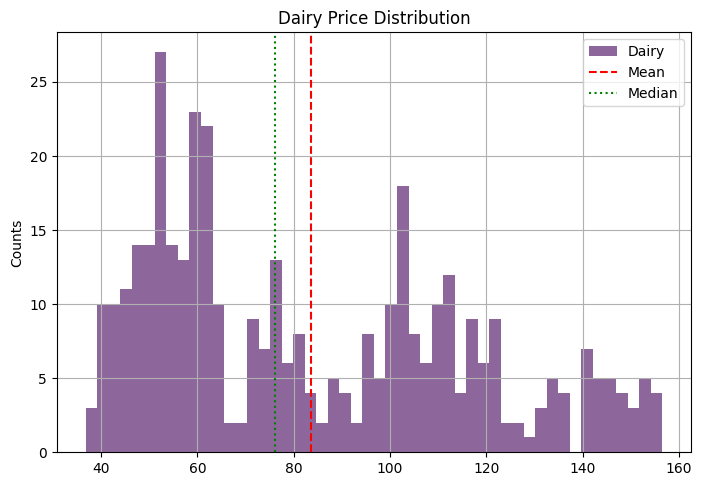

In [8]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
df['Dairy'].hist(bins=50, label='Dairy', alpha=0.6, color='#410258')
plt.axvline(np.mean(df['Dairy']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Dairy']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.xlabel("Price")
plt.title("Dairy Price Distribution")
plt.legend()

Text(0.5, 1.0, 'Dairy Price Distribution')

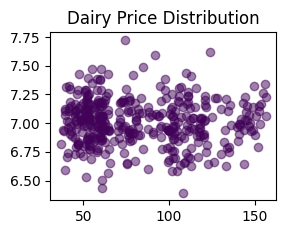

In [13]:
plt.subplot(2, 2, 2)
plt.scatter(df['Dairy'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5 ,color='#410258')
plt.title("Dairy Price Distribution")